## Component Maps
This notebook will demonstrate the correctness of the component maps that will form $f_a$.

To configure the environment you may need to run:
```
poetry env activate
poetry env info --path
```

Then select from the menu within Jupyter.

In [1]:
# Import relevant modules
# So that graphs do not display in their own window we use %matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from zippy.f_a import F_a
from zippy.point import Point
from zippy.utils import generate_complex, f3sqrt, get_color, generate_complex_point

## Visualizing complex functions
A complex number has two components, so visualizing graphs of complex functions is difficult because we cannot visualize four-dimensional space. Instead, we will associate each point in the complex plane with a color. In the next cell, you can see the color scheme that we are using.

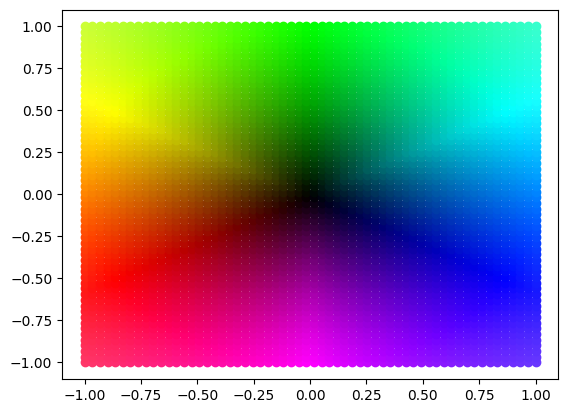

In [2]:
points = generate_complex(-1, 1, -1, 1, 30)
for point in points:
    plt.plot(point.real, point.imag, 'o', color=get_color(point))

## Branch cuts
Part of the map $f_3$ involves taking a square root. We must use the appropriate branch cut in order to ensure that our implementaion behaves as expected. First, to understand what a branch cut is, here are some resources:
- [LibreText Article](https://phys.libretexts.org/Bookshelves/Mathematical_Physics_and_Pedagogy/Complex_Methods_for_the_Sciences_(Chong)/08%3A_Branch_Points_and_Branch_Cuts/8.02%3A_Branches#:~:text=Branches%20of%20the%20complex%20square%20root,-As%20we%20saw&text=Define%20a%20branch%20cut%20along,z%20along%20the%20branch%20cut.)
- [Understanding Branch Cuts in the Complex Plane](https://flothesof.github.io/branch-cuts-with-square-roots.html)
- [complex analysis: polar forms and how branch cuts work](https://www.youtube.com/watch?v=YQotGQJ00C4)

We need to choose how we are going to represent the $\theta$ component of each point in the complex plane. That is, we may represent every $a + bi$ as $re^{i\theta}$ and $\theta$ could be represented as $\theta + 2\pi n$ for any integer $n$. The principal branch is $(-\pi, \pi]$, and this is demonstrated below.

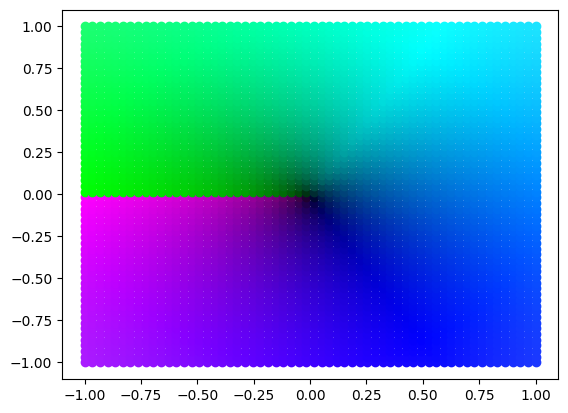

In [3]:
points = generate_complex(-1, 1, -1, 1, 30)
for point in points:
    s = np.sqrt(point)
    plt.plot(point.real, point.imag, 'o', color=get_color(s))

The implementation of The Geodisc Algorithm requires that we use a square root function with a branch cut along $(0, \infty)$, otherwise, our $\theta$ values are in the range $(0, 2\pi]$. Using a custom version of the square root function, we can get the desired branch cut as seen below.

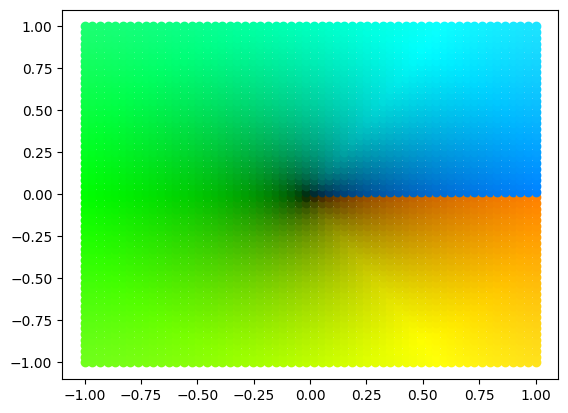

In [4]:
points = generate_complex(-1, 1, -1, 1, 30)
for point in points:
    s = f3sqrt(point)
    plt.plot(point.real, point.imag, 'o', color=get_color(s))

## Component maps: $f_1, f_2, f_3$
Now, we would like to explore each component map to see how each deforms the complex plane. \
On the left, you see the color associated with each point. \
On the right, the color of a point is associated with where that *location* is sent under the map $f_1$. \
So, for example, say in plot Z the point $(0, 0)$ is blue. If there is some point $x$ such that $f_1(x) = (0, 0)$ then the point $x$ is blue.

(np.float64(-1.1207106781186547),
 np.float64(1.5349242404917498),
 np.float64(-0.05),
 np.float64(1.05))

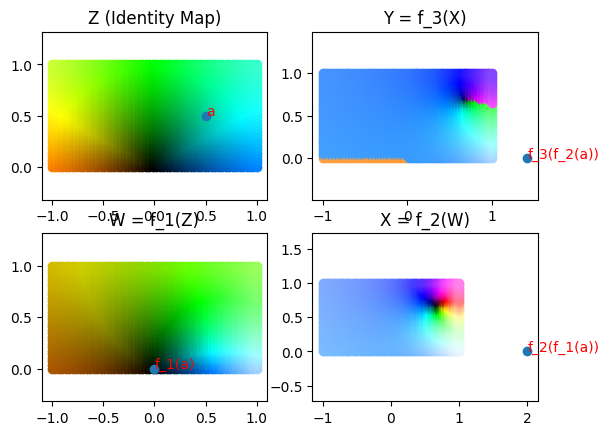

In [5]:
# Generate two subplots stacked horizontally
# Documentation: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, ax = plt.subplots(2, 2)

points = generate_complex(-1, 1, 0, 1, 30)
a = Point(z=complex(.5, .5))
f_a = F_a(a)

# Plot the reference schema
for point in points:
    ax[0, 0].plot(point.real, point.imag, 'o', color=get_color(point))
ax[0, 0].plot(a.z.real, a.z.imag, 'o')
ax[0, 0].annotate('a', (a.z.real, a.z.imag), color='red')
ax[0, 0].set_title('Z (Identity Map)')
ax[0, 0].axis('equal')

# Plot the results of f1
for point in points:
    res = f_a.f1(Point(z=point)).z # Obtain the result of applying f_a to the given point
    ax[1, 0].plot(point.real, point.imag, 'o', color=get_color(res))
image1_a = f_a.f1(a)
ax[1, 0].annotate('f_1(a)', (image1_a.z.real, image1_a.z.real), color='red')
ax[1, 0].plot(image1_a.z.real, image1_a.z.imag, 'o')
ax[1, 0].set_title('W = f_1(Z)')
ax[1, 0].axis('equal')

# Plot the results of f2
for point in points:
    res = f_a.f2(f_a.f1(Point(z=point))).z
    ax[1, 1].plot(point.real, point.imag, 'o', color=get_color(res))
image2_a = f_a.f2(f_a.f1(a))
ax[1, 1].annotate('f_2(f_1(a))', (image2_a.z.real, image2_a.z.imag), color='red')
ax[1, 1].plot(image2_a.z.real, image2_a.z.imag, 'o')
ax[1, 1].set_title('X = f_2(W)')
ax[1, 1].axis('equal')

# Plot the results of f3
for point in points:
    # Since f3 returns a list, take the first output
    res = f_a.f3(f_a.f2(f_a.f1(Point(z=point))))[0].z
    ax[0, 1].plot(point.real, point.imag, 'o', color=get_color(res))
image3_a = f_a.f3(f_a.f2(f_a.f1(a)))[0]
ax[0, 1].annotate('f_3(f_2(a))', (image3_a.z.real, image3_a.z.imag), color='red')
ax[0, 1].plot(image3_a.z.real, image3_a.z.imag, 'o')
ax[0, 1].set_title('Y = f_3(X)')
ax[0, 1].axis('equal')

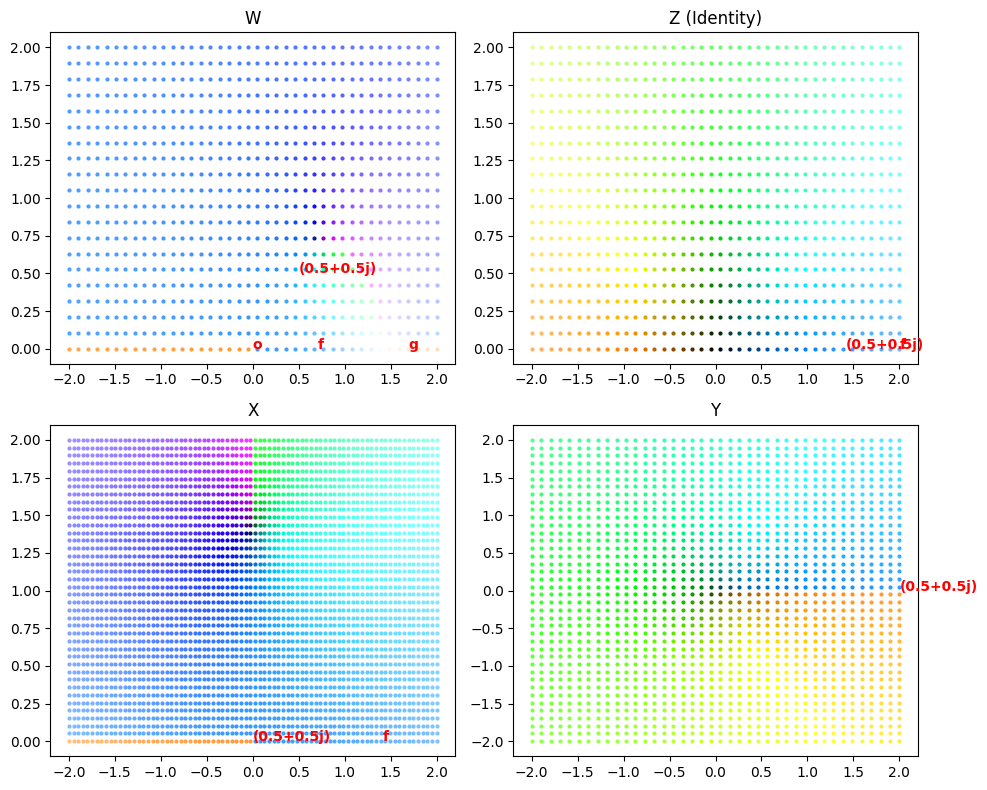

In [ ]:
a = Point(z=complex(.5,.5))
f = F_a(a)
o = Point(complex(0, 0), name='o', is_origin=True)
pts_to_label = [a, o, Point(f.c * 0.5, name='f'), Point(f.b * 1.2, name='g')]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 1].set_title("Z (Identity)")
z_points = generate_complex_point(-2, 2, 0, 2, 15)
for p in z_points:
    axs[0, 1].plot(p.z.real, p.z.imag, 'o', color=get_color(p.z), markersize=2)
for pt in pts_to_label:
    coord = f.f3(f.f2(f.f1(pt)))[0]
    axs[0, 1].annotate(pt.name, (coord.z.real, coord.z.imag), color="red", weight="bold")

axs[1, 1].set_title("Y")
y_points = generate_complex_point(-2, 2, -2, 2, 15)
# FIXME: I don't think that branches are properly assigned here.
for p in y_points:
    try:
        res = f.f3(p)[0]
        axs[1, 1].plot(p.z.real, p.z.imag, 'o', color=get_color(res.z), markersize=2)
    except:
        pass
for pt in pts_to_label:
    coord = f.f2(f.f1(pt))
    axs[1, 1].annotate(pt.name, (coord.z.real, coord.z.imag), color="red", weight="bold")

axs[1, 0].set_title("X")
x_points = generate_complex_point(-2, 2, 0, 2, 15)
for p in x_points:
    if p.branch_sign == 0:
        p.branch_sign = 1 if p.z.real >= 0 else -1
    res = f.f3(f.f2(p))[0]
    axs[1, 0].plot(p.z.real, p.z.imag, 'o', color=get_color(res.z), markersize=2)
for pt in pts_to_label:
    coord = f.f1(pt)
    axs[1, 0].annotate(pt.name, (coord.z.real, coord.z.imag), color="red", weight="bold")

axs[0, 0].set_title("W")
w_points = generate_complex_point(-2, 2, 0, 2, 15)
for p in w_points:
    try:
        res = f.f3(f.f2(f.f1(p)))[0]
        axs[0, 0].plot(p.z.real, p.z.imag, 'o', color=get_color(res.z), markersize=2)
    except:
        pass
for pt in pts_to_label:
    axs[0, 0].annotate(pt.name, (pt.z.real, pt.z.imag), color="red", weight="bold")

plt.tight_layout()
plt.show()